In [1]:
# Importing Libraries

# Numpy for mathematical operations & Pandas for data manipulation and analysis
import numpy as np
import pandas as pd

# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Matplotlib for  data visualization 
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

# 
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


from scipy.stats import shapiro
from scipy import stats

# Standard Scaler
from sklearn.preprocessing import StandardScaler

#SVM
from sklearn.svm import SVC
from sklearn import metrics

# SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

**Data Preprocessing**

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


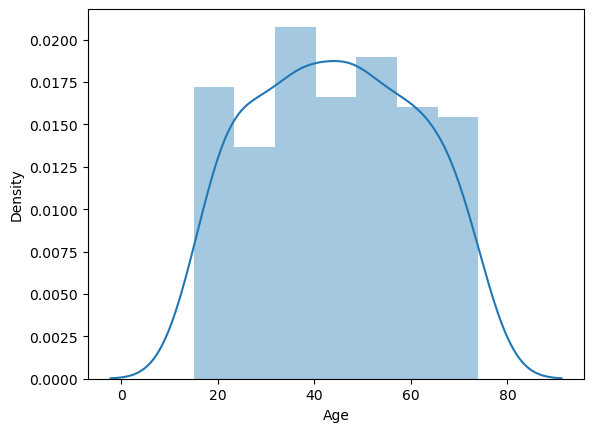

In [9]:
sns.distplot(df['Age']);

In [10]:
df["Sex"].unique()

array(['F', 'M'], dtype=object)

In [11]:
df["Sex"].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

Text(0.5, 1.0, 'Drug Use by Sex')

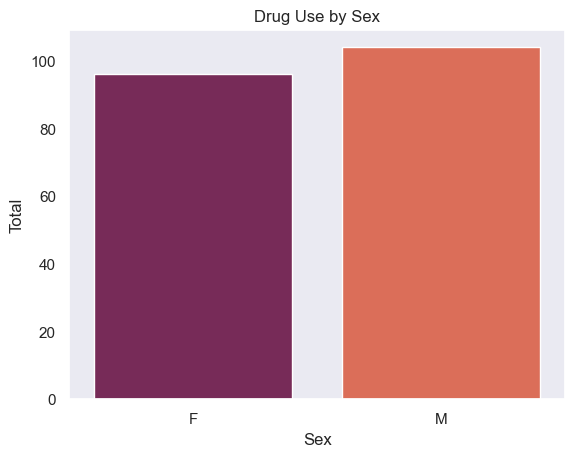

In [12]:
sns.set_theme(style="dark")
sns.countplot(data=df,x="Sex",palette="rocket")
plt.xlabel("Sex")
plt.ylabel("Total")
plt.title("Drug Use by Sex")

In [13]:
df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [14]:
df["BP"].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Text(0.5, 1.0, 'Drug Use by BP')

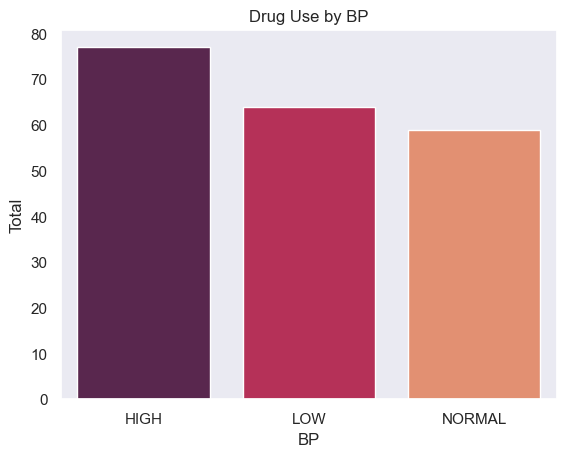

In [15]:
sns.set_theme(style="dark")
sns.countplot(data=df,x="BP",palette="rocket")
plt.xlabel("BP")
plt.ylabel("Total")
plt.title("Drug Use by BP")

In [16]:
df["Cholesterol"].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [17]:
df["Cholesterol"].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Text(0.5, 1.0, 'Drug Use by Cholesterol')

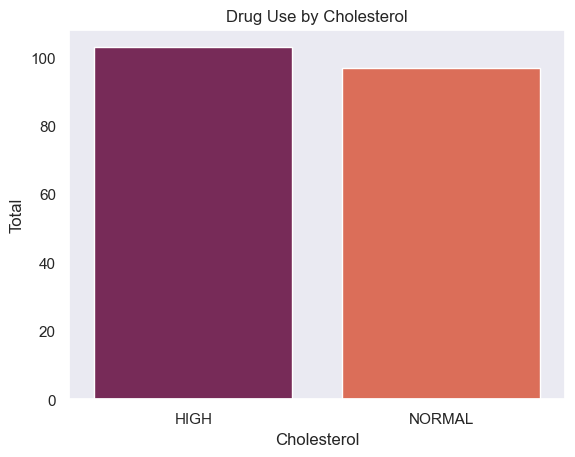

In [18]:
sns.set_theme(style="dark")
sns.countplot(data=df,x="Cholesterol",palette="rocket")
plt.xlabel("Cholesterol")
plt.ylabel("Total")
plt.title("Drug Use by Cholesterol")

In [19]:
df["Na_to_K"].nunique()

198

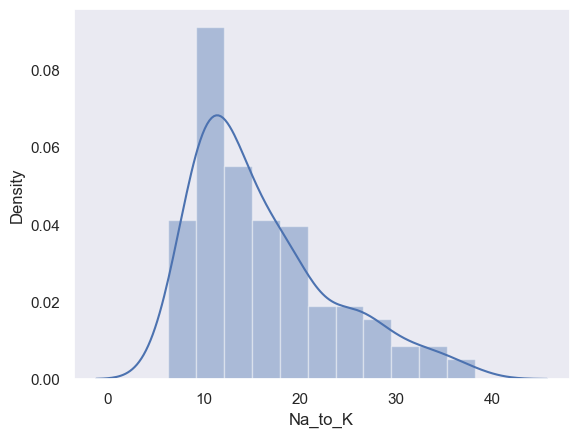

In [20]:
sns.distplot(df['Na_to_K']);

In [21]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [22]:
df["Drug"].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

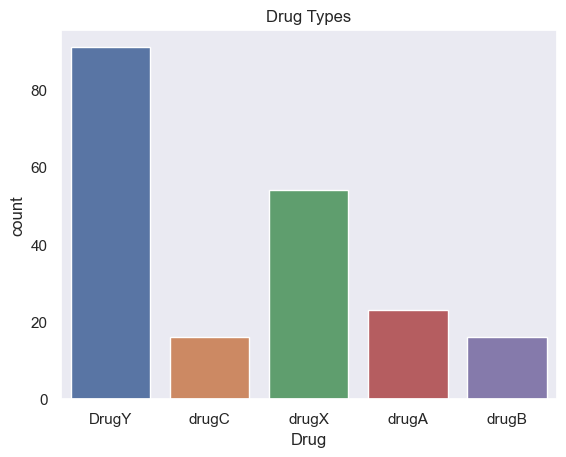

In [23]:
sns.countplot(df, x="Drug")
plt.title("Drug Types");

In [24]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [25]:
#Data Bining - take a lot of continuous data and put them in a range
df['Age'] = pd.cut(df['Age'],
                           bins=[19, 29, 39, 49, 59, 69],
                           labels=['<20s', '20s', '30s', '40s', '50s'])

In [26]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,<20s,F,HIGH,HIGH,25.355,DrugY
1,30s,M,LOW,HIGH,13.093,drugC
2,30s,M,LOW,HIGH,10.114,drugC
3,<20s,F,NORMAL,HIGH,7.798,drugX
4,50s,F,LOW,HIGH,18.043,DrugY


In [27]:
#Data Bining - take a lot of continuous data and put them in a range
df['Na_to_K'] = pd.cut(df['Na_to_K'],
                           bins=[0,9,19,29,50],
                           labels=['<10', '10-20', '20-30', '>30'])

In [28]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,<20s,F,HIGH,HIGH,20-30,DrugY
1,30s,M,LOW,HIGH,10-20,drugC
2,30s,M,LOW,HIGH,10-20,drugC
3,<20s,F,NORMAL,HIGH,<10,drugX
4,50s,F,LOW,HIGH,10-20,DrugY


**Splitting Data**

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
X = df.drop(["Drug"],axis=1)
y = df["Drug"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**Feature Engineering**

In [32]:
#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [33]:
X_train.head()

,Age_<20s,Age_20s,Age_30s,Age_40s,Age_50s,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Na_to_K_<10,Na_to_K_10-20,Na_to_K_20-30,Na_to_K_>30
131,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True
96,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True
181,False,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False
19,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False
153,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False


In [34]:
!pip install imbalanced-learn

In [35]:
X_train.dtypes

Age_<20s              bool
Age_20s               bool
Age_30s               bool
Age_40s               bool
Age_50s               bool
Sex_F                 bool
Sex_M                 bool
BP_HIGH               bool
BP_LOW                bool
BP_NORMAL             bool
Cholesterol_HIGH      bool
Cholesterol_NORMAL    bool
Na_to_K_<10           bool
Na_to_K_10-20         bool
Na_to_K_20-30         bool
Na_to_K_>30           bool
dtype: object

In [36]:
y_train.head()

131    DrugY
96     DrugY
181    drugX
19     DrugY
153    drugX
Name: Drug, dtype: object

**Models**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

dt = DecisionTreeClassifier(max_leaf_nodes=20)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=20)

In [38]:
dt.score(X_train , y_train)

0.8285714285714286

In [39]:
dt_pred = dt.predict(X_test)
dt_acc=accuracy_score(y_test , dt_pred)
dt_acc

0.8

In [40]:
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print('Decision Tree accuracy is: {:.2f}%'.format(dt_acc*100))

              precision    recall  f1-score   support

       DrugY       0.88      0.70      0.78        30
       drugA       0.50      0.60      0.55         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.85      0.94      0.89        18

    accuracy                           0.80        60
   macro avg       0.73      0.85      0.78        60
weighted avg       0.82      0.80      0.80        60

[[21  3  1  2  3]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Decision Tree accuracy is: 80.00%


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
rf_pred = rf.predict(X_test)
rf_acc=accuracy_score(y_test , rf_pred)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print('Random Forest accuracy is: {:.2f}%'.format(rf_acc*100))

              precision    recall  f1-score   support

       DrugY       0.88      0.77      0.82        30
       drugA       0.60      0.60      0.60         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.84      0.89      0.86        18

    accuracy                           0.82        60
   macro avg       0.75      0.85      0.79        60
weighted avg       0.83      0.82      0.82        60

[[23  2  0  2  3]
 [ 1  3  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Random Forest accuracy is: 81.67%


In [50]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=20)
kn.fit(X_train,y_train)
kn_pred = kn.predict(X_test)
kn_acc=accuracy_score(y_test , kn_pred)
print(classification_report(y_test, kn_pred))
print(confusion_matrix(y_test, kn_pred))
print('K Neighbors accuracy is: {:.2f}%'.format(kn_acc*100))

              precision    recall  f1-score   support

       DrugY       0.60      0.70      0.65        30
       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.33      0.25      0.29         4
       drugX       0.75      0.83      0.79        18

    accuracy                           0.62        60
   macro avg       0.34      0.36      0.34        60
weighted avg       0.55      0.62      0.58        60

[[21  1  1  2  5]
 [ 5  0  0  0  0]
 [ 3  0  0  0  0]
 [ 3  0  0  1  0]
 [ 3  0  0  0 15]]
K Neighbors accuracy is: 61.67%


In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=5000)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_acc=accuracy_score(y_test , lr_pred)
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print('Logistic Regression accuracy is: {:.2f}%'.format(lr_acc*100))

              precision    recall  f1-score   support

       DrugY       0.95      0.70      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.86      0.83      0.83        60

[[21  2  1  2  4]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 83.33%


In [52]:
models=pd.DataFrame({
    'models':['Decision_Tree','Random_Forest','K Neighbors','Logistic Regression'],
    'scores':[dt_acc,rf_acc,kn_acc,lr_acc]})
models.sort_values(by='scores',ascending=False)

,models,scores
3,Logistic Regression,0.833333
1,Random_Forest,0.816667
0,Decision_Tree,0.800000
2,K Neighbors,0.616667
